# Isogeometric analysis of the Cahn–Hilliard phase-field model



This section is devoted to using the isogeometric analysis for the numerical approximation of the Cahn-Halliard equation to ensure a regularity needed in the presence of fourth-order operators. For numerical accuracy and stability characteristics, we integrate in time using ***generalized-$\alpha$ method***. The goal is to test the r-refinement method as the mesh refinement method.
.

## 1. The Cahn–Hilliard Equations

  Let $\Omega\subset\mathbb{R}^d$ be an open set with sufficiently smooth boundary, denoted by $\Gamma$, where $d$ is the number of spatial dimensions. We denote by $\mathbf{c}$ the concentration of one of the binary mixture components that we suppose governed by the Cahn-Halliard equation. Then, the problem stated in strong form as :

Find $\mathbf{c} :\overline{\Omega}\times(0,T)\longmapsto\mathbb{R}$ such that 
## $	\begin{align*}
		\left\lbrace\begin{array}{lll}
			\dfrac{\partial \mathbf{c}}{\partial t} ~~~~~=~ \nabla \cdot \big(M_c\nabla (\mu_c - \lambda\Delta\mathbf{c})\big) &\text{ in } \Omega\times(0,T) ,~~~~~~~~~~(1)\\
		    \mathbf{c}~~~~~~~~ =~ g &\text{ on } \Gamma_g\times(0,T),~~~~~~~~(2)\\
            M_c\nabla (\mu_c - \lambda\Delta \mathbf{c})\cdot\vec{n}  = s &\text{ on } \Gamma_s \times(0,T),~~~~~~~~(3)\\     
            M_c \lambda\nabla \mathbf{c}\cdot\vec{n}  = 0 &\text{ on } \Gamma\times(0,T),~~~~~~~~~~(4)\\   
            \mathbf{c}(x,0)  = \mathbf{c}_0(x) &\text{ in } \overline{\Omega},~~~~~~~~~~~~~~~~~~~~~~~~(5)\\         
		\end{array}\right.
	\end{align*}$


Where $\mathbf{c}_0 :\overline{\Omega}\longmapsto\mathbb{R}$ is a given initial concentration functions. $M_c$ is the mobility, and $\mu_c$ is the chemical potential of a regular solution in the absence of phase interface and $\lambda$ is a positive constant such that $\sqrt{\lambda}$ represents a length scale of the problem. We consider a nonlinear relationship between the mobility and the concentration, by

$$M_c = D~\mathbf{c}~(1-\mathbf{c})~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(6)$$ 
in which $D$ is a positive constant which has dimensions of diffusivity, that is, $length^2/time$. Finally, $\mu_c$ is highly nonlinear function of the concentration defined as

$$ \mu_c= \dfrac{1}{2\theta}~log\dfrac{\mathbf{c}}{1-\mathbf{c}} + 1 - 2~\mathbf{c} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(7)$$

where $\theta$ is a dimensionless number which represents the artion between the critical temperature and the absolute temperature.

## 2. Variational form and semidiscrete formulation

Let X be the functional space and $\big(.,.\big)_\Omega$ denote the $L^2$ inner product with respect to  $\Omega$. The variational formulation is stated as follows :

Find $\mathbf{c}\in X$, such that $\forall~w\in X$ : 

$$\textbf{B}\big(w,\mathbf{c}\big) = 0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(8)$$

with

$\begin{align*}\textbf{B}\big(w,\mathbf{c}\big) &= \big(w,\dfrac{\partial\mathbf{c}}{\partial t}\big)_\Omega + \big(\nabla w, M_c \nabla\mu_c + \nabla M_c\Delta\mathbf{c}\big)_\Omega + \big(\Delta
w,M_c\Delta\mathbf{c}\big)_\Omega.~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(9)
\end{align*}$

The space discretization of (11) leads to the following variational problem over the finite element spaces : 

Find $\mathbf{c}^h \in X^h\subset X$, such that $\forall~w^h \in X^h$ : 

$$\textbf{B}\big(w^h,\mathbf{c}^h\big) = 0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(10)$$

where 

$$\mathbf{c}^h = \sum_{i=1}^{n_b} \mathbf{c}_iN_i, ~~~ w^h = \sum_{i=1}^{n_b} w_iN_i~~~~~~~~~~~~~~~~~~(11)$$

$n_b$ is the dimension of discrete space.

## 3. Time discretization using the generalized-$\alpha$ method

Let $c$ and $\dot{c}$ denote the vector of global degrees of freedom and its time derivative, respectively. We define the following residual vectors :
$$\mathbf{R}^c = \Big\{R_i\Big\}$$
$$R_i = \mathbf{B}\big(N_i, \mathbf{c}^h\big)$$
where we denote by $e_j$ is the j-th cartesian basis vector.

Given $\mathbf{c}_n$, $\dot{\mathbf{c}}_n$ at the $n^{th}$ time $t_n$ and $\Delta t_n = t_{n+1}-t_n$ the time step size, the generalized-$\alpha$ method involves finding $\dot{\mathbf{c}}_{n+1}$, $\mathbf{c}_{n+1}$, $\mathbf{c}_{n+\alpha_m}$, $\mathbf{c}_{n+\alpha_f}$ such that

$$\begin{align*}
  \mathbf{R}\big(\dot{\mathbf{c}}_{n+\alpha_m}, \mathbf{c}_{n+\alpha_f}\big) &=0,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(12)\\
  \mathbf{c}_{n+1} &= \mathbf{c}_{n} + \Delta t_n \dot{\mathbf{c}}_{n} + \gamma \Delta t_n \big(\dot{\mathbf{c}}_{n+1} - \dot{\mathbf{c}}_{n}\big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(13)\\
  \dot{\mathbf{c}}_{n+\alpha_m} &= \dot{\mathbf{c}}_{n} + \alpha_m \big( \dot{\mathbf{c}}_{n+1} - \dot{\mathbf{c}}_{n}\big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(14)\\
  \mathbf{c}_{n+\alpha_f}  &= \mathbf{c}_{n} + \alpha_f \big( \mathbf{c}_{n+1} - \mathbf{c}_{n}\big)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(15)
 \end{align*}$$
 
 where $\alpha_m$ , $\alpha_f$ and $\gamma$ are real-valued parameters that define the method.

Jansen, Whiting and Hulbert proved that, the generalized-$\alpha$ method is second-order accurate if and only if 
$$\gamma = \dfrac{1}{2} + \alpha_m -\alpha_f,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(16)$$
and it is unconditionally stable if and only if 
$$\alpha_m \geq \alpha_f \geq \dfrac{1}{2}.~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(17)$$ 
Hence, if (20) holds, then (17) becomes $$\mathbf{c}_{n+1} = \mathbf{c}_{n} + \Delta t_n\Big( \dot{\mathbf{c}}_{n + \alpha_m} + \big(\alpha_f-\dfrac{1}{2}\big)\dot{\mathbf{c}}_{n} - \big(\alpha_f-\dfrac{1}{2}\big)\dot{\mathbf{c}}_{n+1}\Big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(18)$$

The parameters $\alpha_m$ and $\alpha_f$ can be chosen to be equal to

$$\alpha_m = \dfrac{1}{2}\big( \dfrac{3-\rho_\infty}{1+\rho_\infty}\big)$$

$$\alpha_m = \dfrac{1}{1+\rho_\infty}$$
where $\rho_\infty\in [0,1]$ is the spectral radius of the amplification matrix as $\Delta t \rightarrow \infty$, controls high-frequency dissipation.

 # 4. Non-linear solver using Newton's method 

We approximate the non-linear system of equation (15-16) using Newton's method which leads to the following algorithm :

1. Set 
  $$ \mathbf{c}_{n+\alpha_f, (0)} = \mathbf{c}_n$$
  
  $$ \mathbf{\dot{c}}_{n+\alpha_m, (0)} = \dfrac{\gamma-1}{\gamma}\mathbf{\dot{c}}_n$$  
  
2. From the (14)-(15) we have the following system at the $\alpha$-levels
 
 $$ \mathbf{J_R} = \alpha_m~~\dfrac{\mathbf{R}\big(\dot{\mathbf{c}}_{n+\alpha_m}, \mathbf{c}_{n+\alpha_f}\big)}{\partial \mathbf{c}_{n+\alpha_m}}+\Delta t \gamma\alpha_f~~\dfrac{\mathbf{R}\big(\dot{\mathbf{c}}_{n+\alpha_m}, \mathbf{c}_{n+\alpha_f}\big)}{\partial \mathbf{c}_{n+\alpha_f}}$$
 
  #### b- Newton Method
##### Multicorrector stage: Repeat the following steps:
###### 1.Evaluate iterates at the $\alpha$-levels:
where
$$\begin{align*}
  \dot{\mathbf{c}}_{n+\alpha_m,(i)} &= \dot{\mathbf{c}}_{n} + \alpha_m \big( \dot{\mathbf{c}}_{n+1,(i-1)} - \dot{\mathbf{c}}_{n}\big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(14)\\
  \mathbf{c}_{n+\alpha_f,(i)}  &= \mathbf{c}_{n} + \alpha_f \big( \mathbf{c}_{n+1,(i-1)} - \mathbf{c}_{n}\big)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(15)
 \end{align*}$$
 
###### 2. Use these a -level iterates to assemble the residual and the tangent matrix of the linear system:

$$ \mathbf{J_R}\big(\dot{\mathbf{c}}_{n+\alpha_m,(i)}, \mathbf{c}_{n+\alpha_f,(i)}\big) \Delta \mathbf{c}_{n+1,(i)}= -\mathbf{R}\big(\dot{\mathbf{c}}_{n+\alpha_m,(i)}, \mathbf{c}_{n+\alpha_f,(i)}\big)$$


###### 3. Use $\Delta \mathbf{c}_{n+1,(i)}$ to update the iterates as
$$\begin{align*}
  \dot{\mathbf{c}}_{n+1,(i)} &= \mathbf{\dot{c}}_{n+1,(i-1)} + \Delta t ~~\gamma \Delta \mathbf{c}_{n+1,(i)},~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(14)\\
  \mathbf{\dot{c}}_{n+1,(i)}  &= \mathbf{\dot{c}}_{n+1,(i-1)} + \Delta \mathbf{c}_{n+1,(i)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(15)
 \end{align*}$$
  
This complites one nonlinear iteration. The tolerance is given by reducing residual $\mathbf{R}$ to $10^{-3}$ or $10^{-4}$.

# 5. Numerical implementation under psydac.

$\textit{TODO}$

In [37]:
from sympy import pi, cos, sin, exp, log, symbols, sqrt
from sympy.utilities.lambdify import implemented_function
import pytest

from sympde.calculus import grad, dot
from sympde.calculus import laplace, div
from sympde.topology import ScalarFunctionSpace
from sympde.topology import element_of
from sympde.topology import NormalVector
from sympde.topology import Square
from sympde.topology import Union
from sympde.expr     import BilinearForm, LinearForm, integral
from sympde.expr     import Norm
from sympde.expr     import find, EssentialBC
from sympde.expr.expr import linearize
from sympde.core     import Constant

from psydac.fem.basic          import FemField
from psydac.api.discretization import discretize

x,y,z = symbols('x1, x2, x3')

from sympy import diff
dx  = lambda e: diff(e,x)
dy  = lambda e: diff(e,y)

from numpy import random, max, absolute
import numpy as np

#==============================================================================
def get_boundaries(*args):

    if not args:
        return ()
    else:
        assert all(1 <= a <= 4 for a in args)
        assert len(set(args)) == len(args)

    boundaries = {1: {'axis': 0, 'ext': -1},
                  2: {'axis': 0, 'ext':  1},
                  3: {'axis': 1, 'ext': -1},
                  4: {'axis': 1, 'ext':  1}}

    return tuple(boundaries[i] for i in args)

In [38]:
from matplotlib import pyplot as plt
#from simplines import plot_field_2d
from psydac.utilities.utils import refine_array_1d 
import numpy as np
levels = np.linspace(-0.,1.,100)

def plot_field(field, N=40, i_sav = 0):
    Vh = field.space
    eta1 = refine_array_1d( Vh.spaces[0].breaks, N )
    eta2 = refine_array_1d( Vh.spaces[1].breaks, N )
    num = np.array( [[ field( e1,e2 ) for e2 in eta2] for e1 in eta1] )
    plt.contourf( eta1, eta2, num, levels, cmap='jet' )  
    plt.colorbar()
    plt.savefig('figs/u_{}.png'.format(i_sav))
    #plt.show(block=False) 
    plt.close()

In [39]:
# ..Topological domain
domain         = Square()#bounds1=(0.,2.*pi**2), bounds2=(0.,2.*pi**2))
#B_dirichlet_0 = domain.boundary

In [40]:
# ..Function Space
V  = ScalarFunctionSpace('V', domain)

In [41]:
#  ... Parameters for generalized-alpha method
alpha_m = Constant(name='alpha_m') #0.5 * ((3. - rho_inf)/(1. + rho_inf))
alpha_f = Constant(name='alpha_f') #1/(1. + rho_inf)
gamma   = Constant(name='gamma') #0.5 + alpha_m - alpha_f
alpha   = 3000.
theta   = 3./2
# .. Defining the Linear form $G$
u   = element_of(V, name='u')
v   = element_of(V, name='v')
w   = element_of(V, name='w')

# time step
t   = Constant(name='t')
dt  = Constant(name='dt')
u0  = element_of(V, name='u0') 
du0 = element_of(V, name='du0') 

In [42]:
# Linear form g: V --> R
#g = LinearForm(v, integral(domain, alpha_m * u * v + (alpha_f * gamma * dt) * (  ((3.*alpha/(2.*theta))*(1- 4.*theta*w*(1.-w)) + (1.-2.*w)*laplace(w) )*dot(grad(u), grad(v)) + w * (1.-w) * laplace(u) * laplace(v) + ( (-6.*alpha)*(1.-2.*w)*u - 2.*u*laplace(w) + (1.-2.*w)*laplace(u) ) * dot(grad(w),grad(v)) + (1.-2.*w)*u*laplace(w)*laplace(v) )))
#du  = element_of(V, name='du')
# ...

In [43]:
# Bilinear form a: V x V --> R
expr11 = ((3.*alpha/(2.*theta))*(1- 4.*theta*u0*(1.-u0)) + (1.-2.*u0)*laplace(u0) )*dot(grad(u), grad(v))
expr12 = ( (-6.*alpha)*(1.-2.*u0)*u - 2.*u*laplace(u0) + (1.-2.*u0)*laplace(u) ) * dot(grad(u0),grad(v))
#___
expr21 = u0 * (1.-u0) * laplace(u) * laplace(v)
expr22 = (1.-2.*u0)*u*laplace(u0)*laplace(v)
a = BilinearForm((u, v), integral(domain, alpha_m * u * v + (alpha_f * gamma * dt) * ( expr11  + expr21 + expr12 + expr22 ) ))
# Linear form l: V --> R
l = LinearForm(v, integral(domain,  du0 * v + ((3.*alpha/(2.*theta))*(1. - 4.*theta*u0*(1.-u0) ) + (1.-2.*u0) * laplace(u0) ) * dot(grad(u0),grad(v)) + u0 * (1. - u0) * laplace(u0) * laplace(v)  ))

# 2-order computes statistical moment
l_SM = LinearForm(v, integral(domain,  (u0-du0)**2*v ))

# ... Ginzburg–Landau free energy
l_FE = LinearForm(v, integral(domain,  ( u0*log(abs(u0)) +(1-u0)*log(abs(1-u0)) + 2*theta*u0*(1.-u0) + theta/(3.*alpha)*sqrt(dx(u0)**2+dy(u0)**2) ) * v ))

In [44]:
# Variational model
equation = find(u, forall=v, lhs=a(u, v), rhs=-l(v) )

In [45]:
# Create computational domain from topological domain
domain_h = discretize(domain, ncells=[32,32])

# Discrete spaces
Vh = discretize(V, domain_h, degree=[2,2], periodic = [True, True])

# Discretize equation using Dirichlet bc
equation_h = discretize(equation, domain_h, [Vh, Vh], periodic = [True, True])

# .. Computes Residual 
lh     = discretize(l, domain_h, Vh)

# 2th-order computes statistical moment
lh_sm  = discretize(l_SM, domain_h, Vh)

# ... Ginzburg–Landau free energy
lh_fe  = discretize(l_FE, domain_h, Vh)

# ...
nbasis = [w.nbasis for w in Vh.spaces]
p1,p2  = Vh.degree

In [46]:
def G_alpha_solve(alpha_mh, alpha_fh, gammah, dt_h, u0_h, du0_h, niter=50):
    
    Un_f    = FemField( Vh, Vh.vector_space.zeros() )
    Un_m    = FemField( Vh, Vh.vector_space.zeros() )
    # ... tools for G-alpha method
    Un      = FemField( Vh, Vh.vector_space.zeros() )
    dUn     = FemField( Vh, Vh.vector_space.zeros() )
    # ...
    Un.coeffs._data[p1:-p1,p2:-p2]  = u0_h.coeffs._data[p1:-p1,p2:-p2]
    Un.coeffs.update_ghost_regions()
    dUn.coeffs._data[p1:-p1,p2:-p2] = (gammah-1.)/gammah * du0_h.coeffs._data[p1:-p1,p2:-p2]         
    dUn.coeffs.update_ghost_regions()
    #...Newton iteration for non-linear system
    for i in range(niter):
        #... alpha level
        Un_m.coeffs._data[p1:-p1,p2:-p2] = du0_h.coeffs._data[p1:-p1,p2:-p2] + alpha_mh *(dUn.coeffs._data[p1:-p1,p2:-p2]- du0_h.coeffs._data[p1:-p1,p2:-p2])
        Un_m.coeffs.update_ghost_regions()
        Un_f.coeffs._data[p1:-p1,p2:-p2] = u0_h.coeffs._data[p1:-p1,p2:-p2] + alpha_fh *(Un.coeffs._data[p1:-p1,p2:-p2]- u0_h.coeffs._data[p1:-p1,p2:-p2])
        Un_f.coeffs.update_ghost_regions()

        delta_x  = equation_h.solve(u0 = Un_f, du0 = Un_m, dt = dt_h, alpha_m = alpha_mh, alpha_f = alpha_fh, gamma = gammah)
        # ...
        Un.coeffs._data[p1:-p1,p2:-p2]  = Un.coeffs._data[p1:-p1,p2:-p2] + gammah * dt_h * delta_x.coeffs._data[p1:-p1,p2:-p2]
        Un.coeffs.update_ghost_regions() 
        dUn.coeffs._data[p1:-p1,p2:-p2] = dUn.coeffs._data[p1:-p1,p2:-p2] + delta_x.coeffs._data[p1:-p1,p2:-p2] 
        dUn.coeffs.update_ghost_regions() 

        # assemble the rhs and convert it to numpy array
        res = lh.assemble(u0=Un_f, du0=Un_m).toarray()
        Res        = max(absolute(res))

        if Res < 1e-4 :
            print('perform the iteration number : = {} Residual  = {}'.format( i, Res))
            break
    return Un, dUn
    

In [47]:
def Time_dependent_Poisson(Tf, u0_h, du0_h):
    dt_h    = 1e-7
    t_h     = 0.
    n_iter  = []
    Sol_CH  = []
    GL_fe   = []
    # ...
    U0      = FemField( Vh, Vh.vector_space.zeros() )
    U0.coeffs._data[p1:-p1,p2:-p2]  = u0_h.coeffs._data[p1:-p1,p2:-p2]

    #  ... Parameters for generalized-alpha method
    rho_infh = 0.5
    alpha_mh = 0.5 * ((3. - rho_infh)/(1. + rho_infh))
    alpha_fh = 1/(1. + rho_infh)
    gammah   = 0.5 + alpha_mh - alpha_fh
    # ...For t>t0
    i_sav = 0
    plot_field(u0_h, N=2, i_sav = i_sav)
    while t_h < Tf :
        t_h += dt_h
        # ...
        Un, dUn = G_alpha_solve(alpha_mh, alpha_fh, gammah, dt_h, u0_h, du0_h)
        # .. update u0
        u0_h.coeffs._data[p1:-p1,p2:-p2]  = Un.coeffs._data[p1:-p1,p2:-p2]
        u0_h.coeffs.update_ghost_regions()
        du0_h.coeffs._data[p1:-p1,p2:-p2] = dUn.coeffs._data[p1:-p1,p2:-p2]
        du0_h.coeffs.update_ghost_regions()
        i_sav +=1 
        plot_field(u0_h, N=2, i_sav = i_sav)
        
        # ...
        n_iter.append(t_h)
        Sol_CH.append(np.sum(lh_sm.assemble(u0=U0, du0=u0_h).toarray()))
        GL_fe.append(np.sum(lh_fe.assemble(u0=u0_h).toarray()))
        print('time step = ', t_h)
        # ...
        plt.figure() 
        plt.axes().set_aspect('equal')
        #plt.subplot(121)
        plt.plot(n_iter, Sol_CH, 'o-b', linewidth = 2., label='$\mathbf{2th-Statistical-Moment}$')
        plt.xscale('log')
        plt.grid(True)
        plt.legend()
        plt.savefig('figs/M2_{}.png'.format(i_sav))
        plt.show(block=False)
        plt.close()
        # ---
        plt.figure()
        plt.axes().set_aspect('equal')
        #plt.subplot(122)
        plt.plot(n_iter, GL_fe,  '--or', label = '$\mathbf{GL-free-energy}$' )
        plt.xscale('log')
        plt.grid(True)
        plt.legend()
        plt.subplots_adjust(wspace=0.3)
        plt.savefig('figs/GlE_{}.png'.format(i_sav))
        plt.show(block=False)
        plt.close()
        
    return u0_h, du0_h

In [48]:
u0_h    = FemField( Vh, Vh.vector_space.zeros() )
u0_h.coeffs._data[p1:-p1,p2:-p2] = (1.-2.*random.rand(nbasis[0],nbasis[1]))*0.05 +0.63
u0_h.coeffs.update_ghost_regions() 

#.. computes the projection of du_0 in the space
a_app = BilinearForm((u, v),integral(domain,u*v))  
#.. 
l_app = LinearForm(v, integral(domain,  ( (3.*alpha/(2.*theta)) * (1.-4.*theta*u0*(1.-u0)) + (1.-2.*u0)*laplace(u0)) *dot(grad(u0), grad(v)) + u0*(1.-u0)*laplace(u0)*laplace(v)  ))

#..
equation_app = find(u, forall=v, lhs=a_app(u, v), rhs= -l_app(v))
#..
equation_app_h = discretize(equation_app, domain_h, [Vh, Vh], periodic = [True, True])
# Solve linear system
du0_h = equation_app_h.solve(u0 = u0_h)
du0_h.coeffs.update_ghost_regions() 

perform the iteration number : = 2 Residual  = 3.678553417429953e-07
time step =  1e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


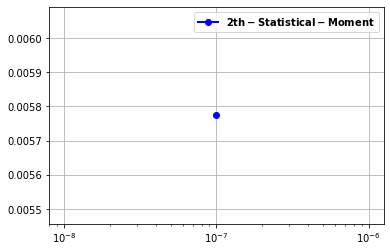

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


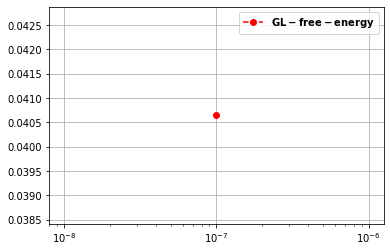

perform the iteration number : = 2 Residual  = 5.1668415324002126e-08
time step =  2e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


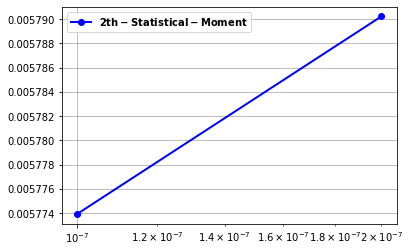

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


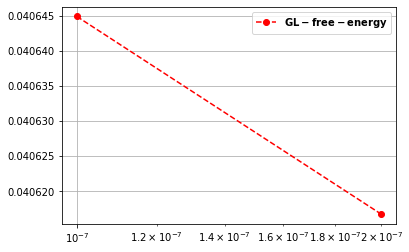

perform the iteration number : = 2 Residual  = 7.169621163427564e-08
time step =  3e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


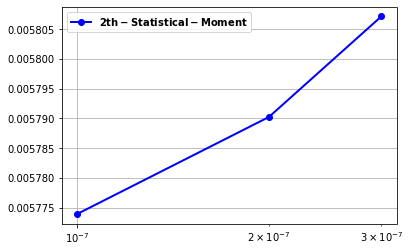

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


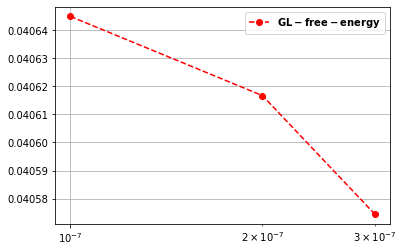

perform the iteration number : = 2 Residual  = 1.0046704446153853e-07
time step =  4e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


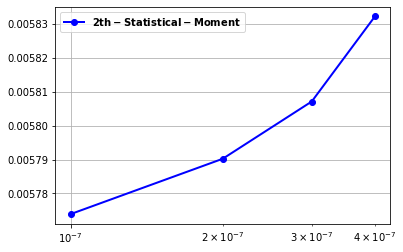

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


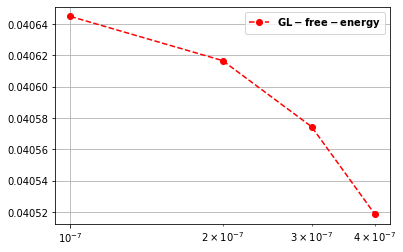

perform the iteration number : = 2 Residual  = 1.61898189077192e-07
time step =  5e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


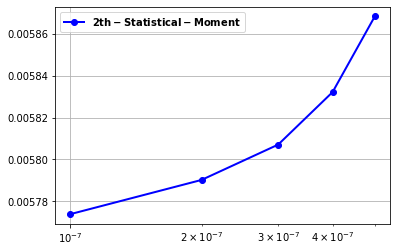

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


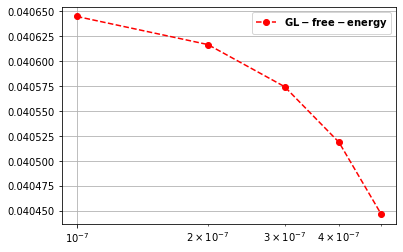

perform the iteration number : = 2 Residual  = 2.718344607188783e-07
time step =  6e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


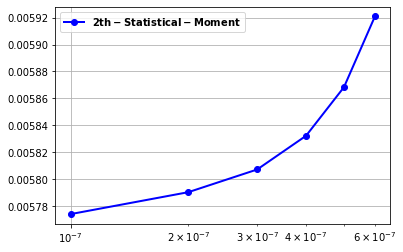

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


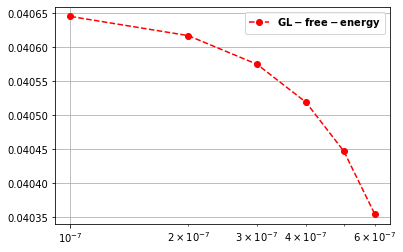

perform the iteration number : = 2 Residual  = 4.583693762327812e-07
time step =  7e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


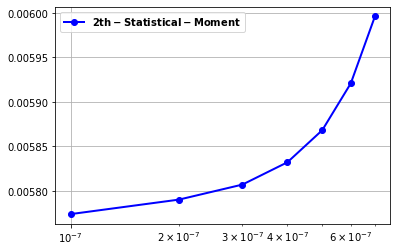

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


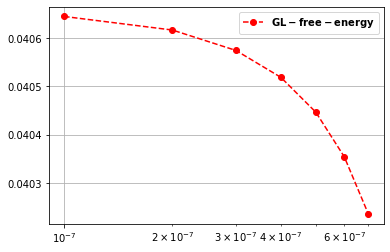

perform the iteration number : = 2 Residual  = 7.713916971852086e-07
time step =  8e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


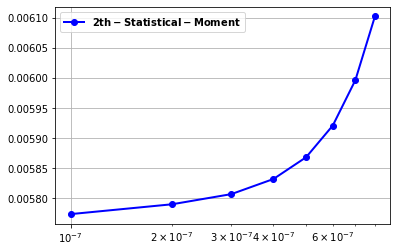

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


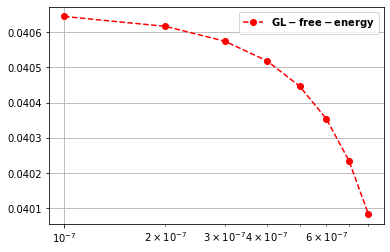

perform the iteration number : = 2 Residual  = 1.2825409587691183e-06
time step =  9e-07


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


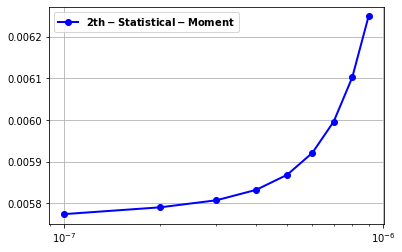

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


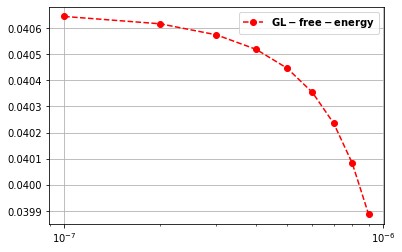

perform the iteration number : = 2 Residual  = 2.09181140142789e-06
time step =  1e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


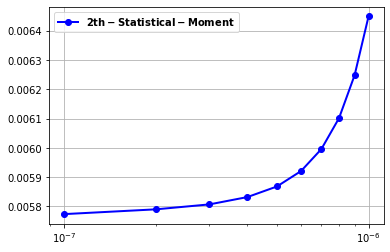

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


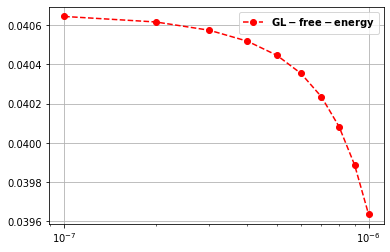

perform the iteration number : = 2 Residual  = 3.3221489612600408e-06
time step =  1.1e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


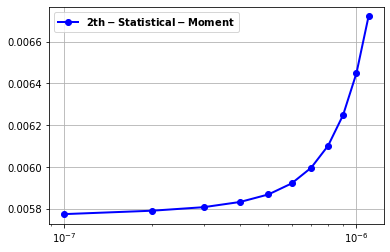

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


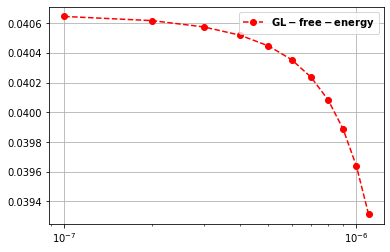

perform the iteration number : = 2 Residual  = 5.095137369792724e-06
time step =  1.2e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


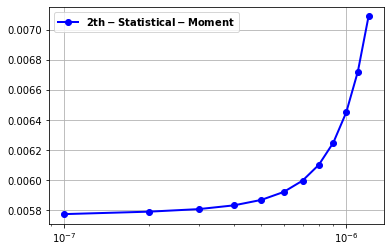

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


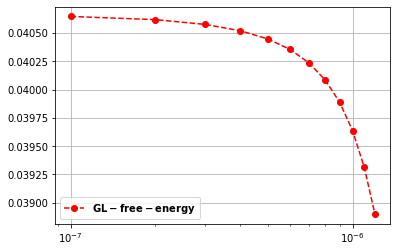

perform the iteration number : = 2 Residual  = 7.476993838295698e-06
time step =  1.2999999999999998e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


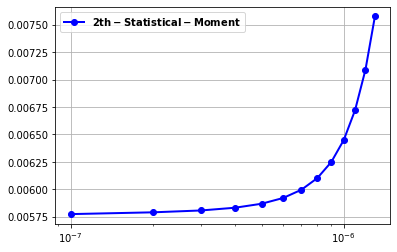

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


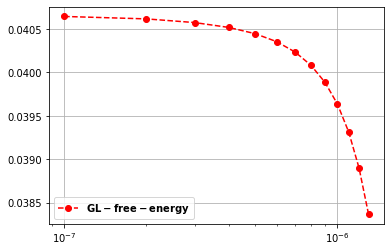

perform the iteration number : = 2 Residual  = 1.0910460506607933e-05
time step =  1.3999999999999997e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


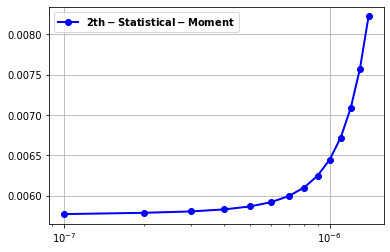

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


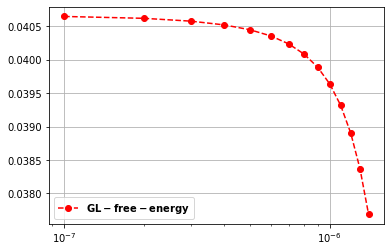

perform the iteration number : = 2 Residual  = 3.488343497792812e-05
time step =  1.4999999999999996e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


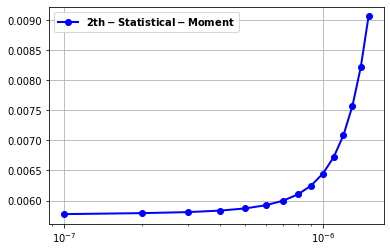

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


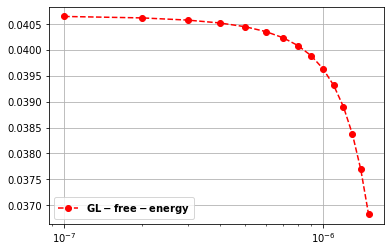

perform the iteration number : = 3 Residual  = 7.72910624391443e-11
time step =  1.5999999999999995e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


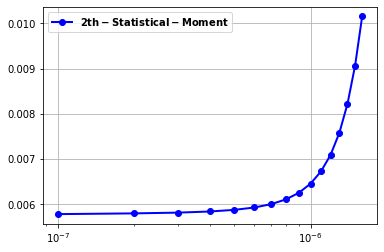

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


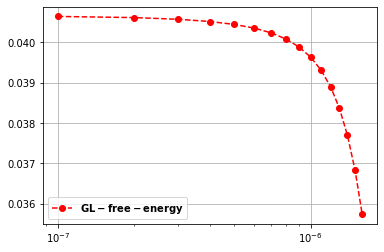

perform the iteration number : = 3 Residual  = 9.491785135651298e-11
time step =  1.6999999999999994e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


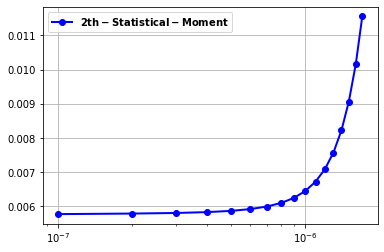

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


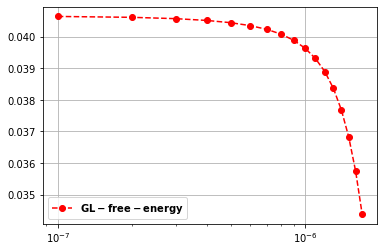

perform the iteration number : = 3 Residual  = 9.476153195464576e-11
time step =  1.7999999999999993e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


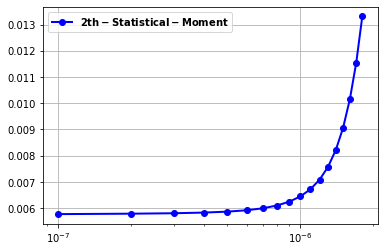

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


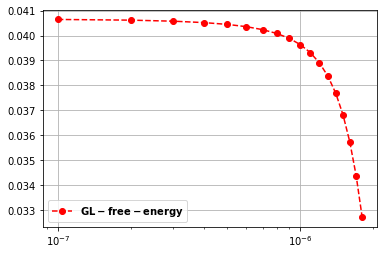

perform the iteration number : = 3 Residual  = 6.997247226081527e-11
time step =  1.8999999999999992e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


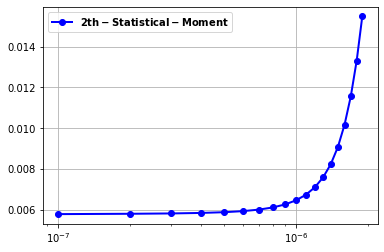

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


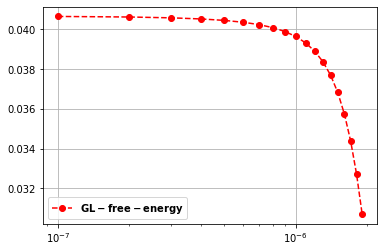

perform the iteration number : = 3 Residual  = 9.264056188840186e-11
time step =  1.999999999999999e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


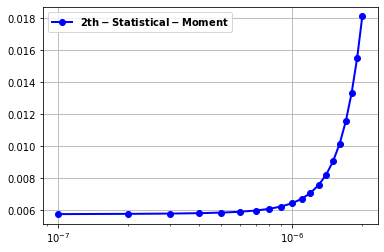

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


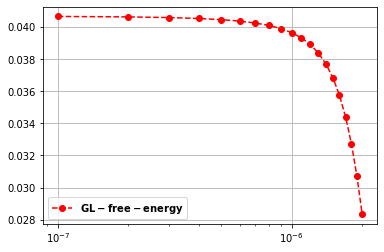

perform the iteration number : = 3 Residual  = 8.83022543973766e-11
time step =  2.099999999999999e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


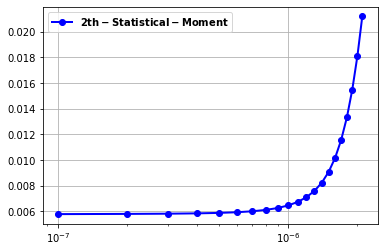

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


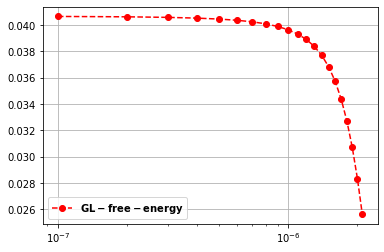

perform the iteration number : = 3 Residual  = 1.111646330542726e-10
time step =  2.199999999999999e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


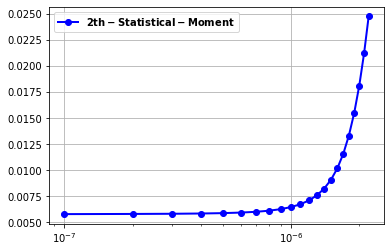

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


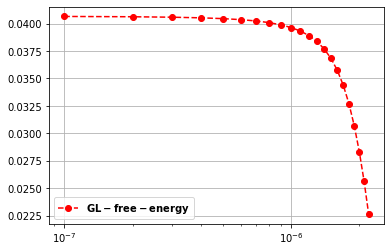

perform the iteration number : = 3 Residual  = 1.0956840990061778e-10
time step =  2.2999999999999987e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


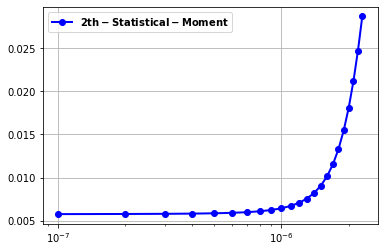

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


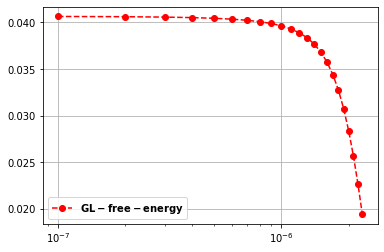

perform the iteration number : = 3 Residual  = 7.620926112394955e-11
time step =  2.3999999999999986e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


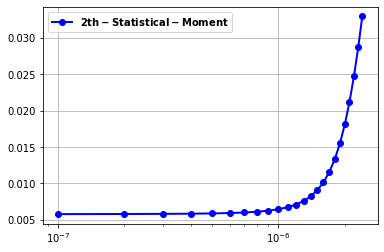

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


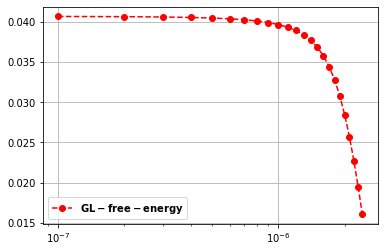

perform the iteration number : = 3 Residual  = 1.2822098938158888e-10
time step =  2.4999999999999985e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


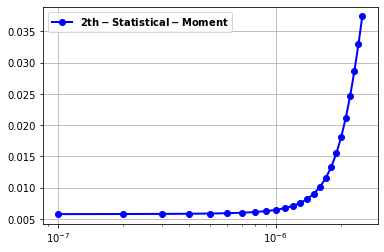

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


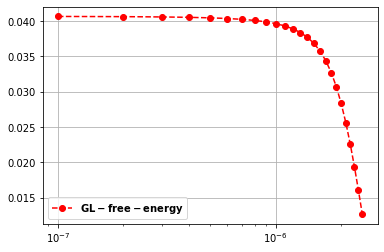

perform the iteration number : = 3 Residual  = 1.1529976973179146e-10
time step =  2.5999999999999984e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


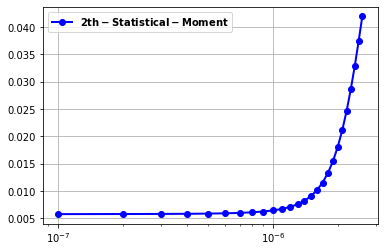

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


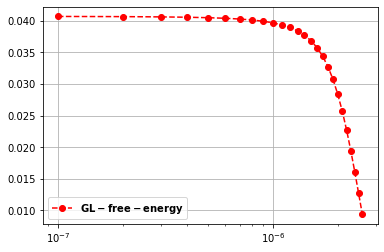

perform the iteration number : = 3 Residual  = 9.206146955875738e-11
time step =  2.6999999999999983e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


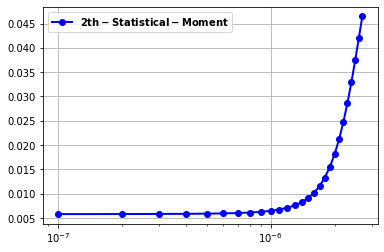

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


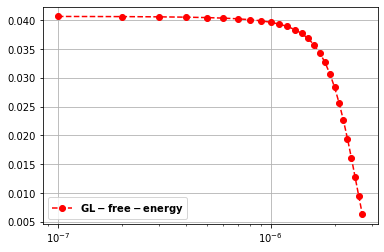

perform the iteration number : = 3 Residual  = 6.59952092973981e-11
time step =  2.799999999999998e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


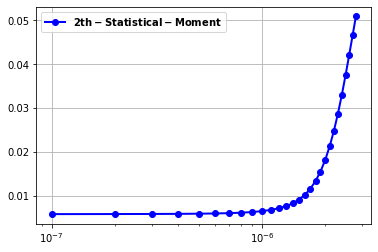

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


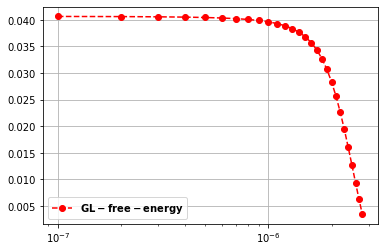

perform the iteration number : = 3 Residual  = 1.268762872541629e-10
time step =  2.899999999999998e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


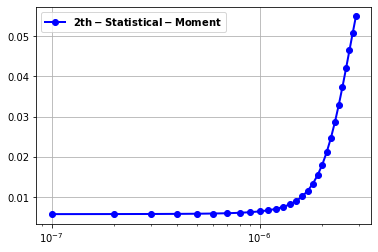

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


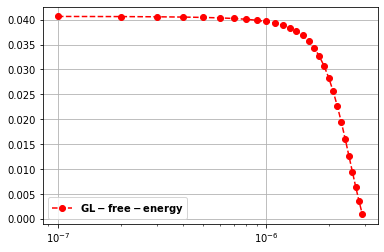

perform the iteration number : = 3 Residual  = 8.749712065991844e-11
time step =  2.999999999999998e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


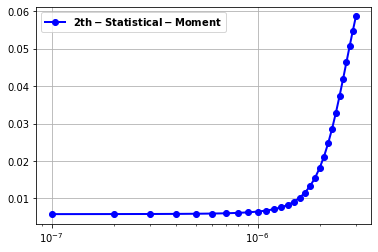

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


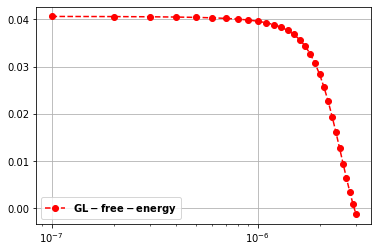

perform the iteration number : = 3 Residual  = 9.78630509962386e-11
time step =  3.099999999999998e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


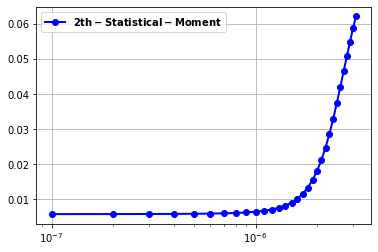

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


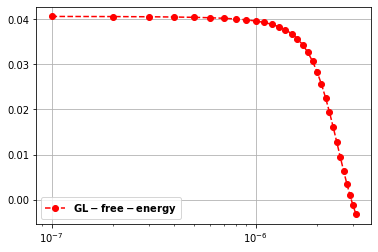

perform the iteration number : = 3 Residual  = 1.0720668797148392e-10
time step =  3.1999999999999977e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


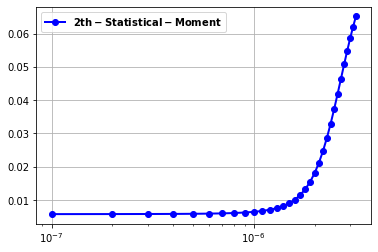

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


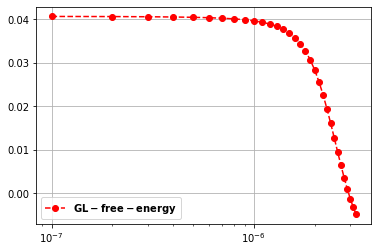

perform the iteration number : = 3 Residual  = 8.495815162490317e-11
time step =  3.2999999999999976e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


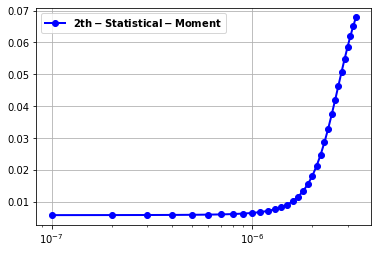

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


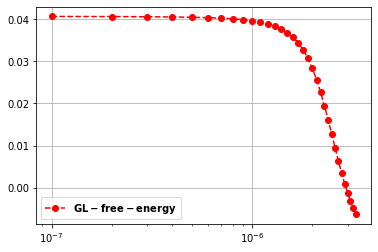

perform the iteration number : = 3 Residual  = 6.47133457931659e-11
time step =  3.3999999999999975e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


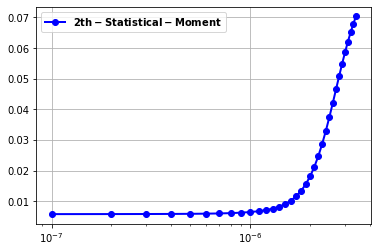

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


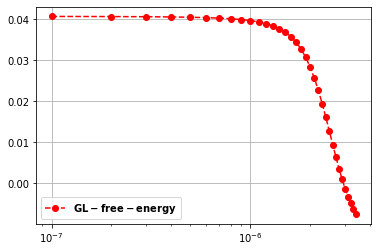

perform the iteration number : = 3 Residual  = 9.976020010071807e-11
time step =  3.4999999999999974e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


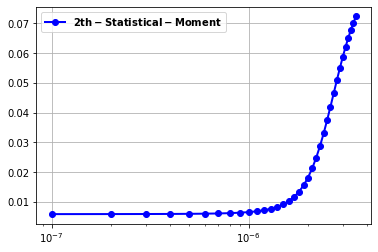

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


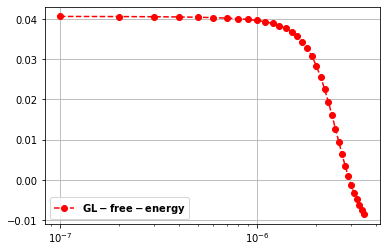

perform the iteration number : = 3 Residual  = 1.1753797934943577e-10
time step =  3.5999999999999973e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


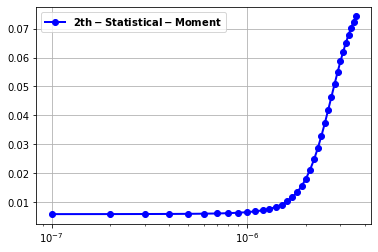

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


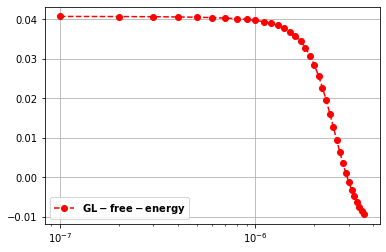

perform the iteration number : = 3 Residual  = 9.056577709998237e-11
time step =  3.699999999999997e-06


/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


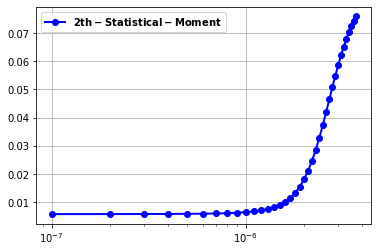

/home/bahari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/home/bahari/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


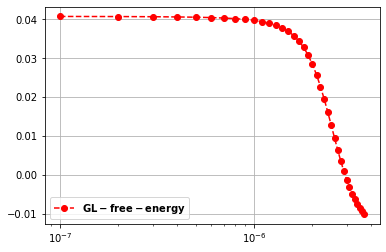

KeyboardInterrupt: 

In [49]:
Tf      = 1.

un, du  = Time_dependent_Poisson(Tf, u0_h, du0_h)

### m.bahari